# Work Sample for Data Scientist Position at Spotify

This sample includes three parts:
1. Draw distribution plots for top spotify songs of 2017 and other less popular songs.Compare the differences between two datasets to look for common patterns in the audio features of top songs.
2. Draw correlation heatmap to find out the relationship between audio features.
3. Use Classification Tree Analysis to predict whether or not a person would like a song based on its audio features.

Data is extracted using the Spotify Web API and the spotify Python library.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data
TopSpotifySongs = pd.read_csv("featuresdf.csv")
allsongdata = pd.read_csv("allsongdata.csv")

In [3]:
allsongdata = allsongdata.drop_duplicates(['name'], keep='first')

## Distribution Plots for Top Spotify Songs of 2017/Less Popular Songs

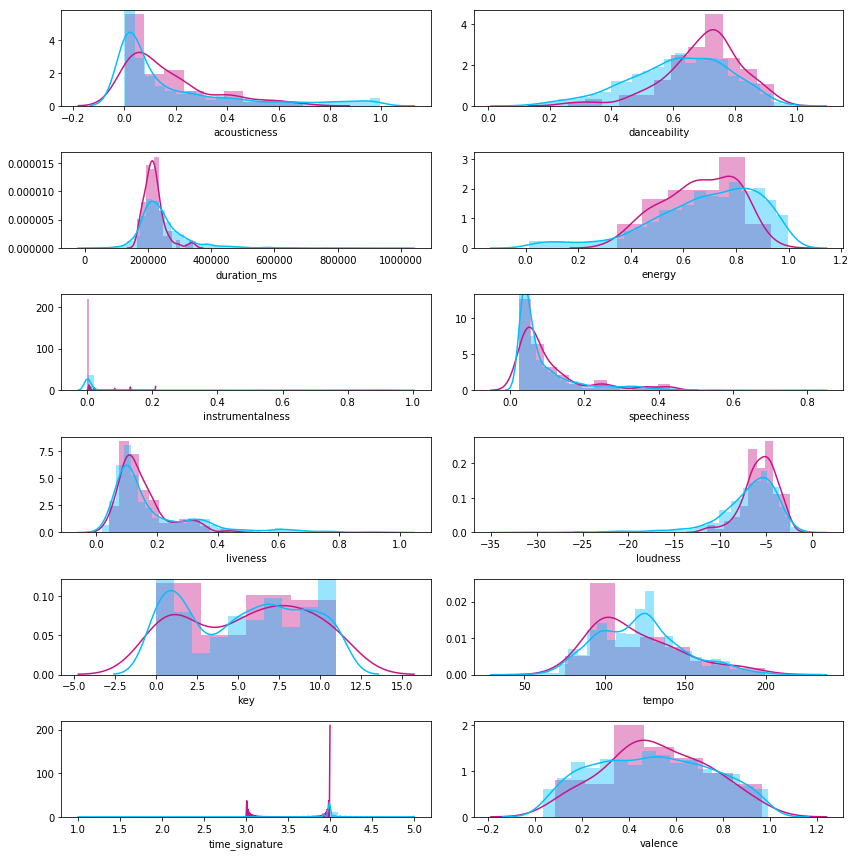

In [9]:
COL_NUM = 2
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (feature, agency_count) in enumerate(TopSpotifySongs[["acousticness","danceability","duration_ms","energy","instrumentalness","speechiness","liveness","loudness",
                "key","tempo","time_signature","valence"]].items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    sns.distplot(TopSpotifySongs[feature],ax=ax,color="mediumvioletred")
    sns.distplot(allsongdata[feature],ax=ax,color="deepskyblue")

plt.tight_layout() 

We can conclude that popular songs have the following features:
1. top songs are more acoustic.
2. they are more suitable for dancing.
3. many popular songs are at 100 BMP.

## Correlation Heatmap of Audio Features

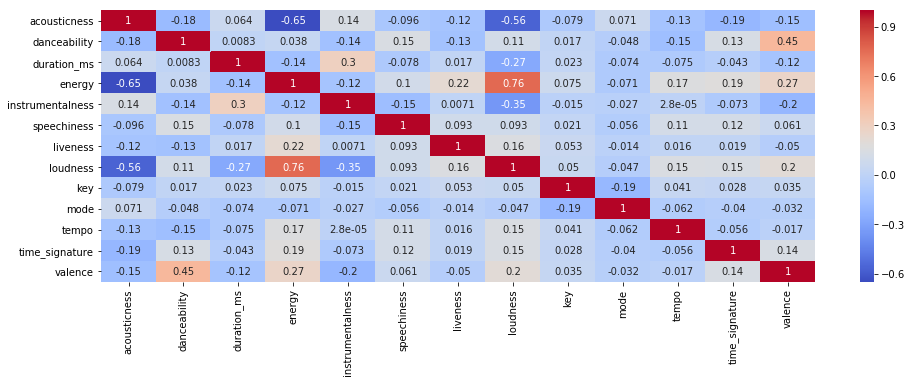

In [52]:
plt.figure(figsize = (16,5))
sns.heatmap(allsongdata[["acousticness","danceability","duration_ms","energy","instrumentalness","speechiness","liveness","loudness",
                "key","mode","tempo","time_signature","valence"]].corr(), cmap="coolwarm", annot=True)
plt.show()

1. Loudness and energy are highly correlated with a correlation coefficient of 0.76. It is not surprising since loundness is one of the features that contributes to energy.
2. Valence and danceability are positively correlated with a correlation coefficient of 0.45, which means more positive the track is, more suitable the track is for dancing.
3. Acousticness and energy are negatively correlated with a correlation coefficient of -0.65 which means music that primarily uses acoustic instruments has less energetic track.
4. Acousticness and loudness are negatively correlated with a correlation coefficient of -0.56 which means acoustic music has a low level of loudness.

## Try to predict whether or not a person would like a song based on its audio features.

In [4]:
allsongdata.describe()

,idd,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1956.000000,1956.000000,1956.000000,1.956000e+03,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000
mean,1009.436605,0.187212,0.618486,2.458647e+05,0.682956,0.133045,5.339468,0.190369,-7.071711,0.611963,0.092580,121.796418,3.967280,0.499849,0.503067
std,582.954494,0.259358,0.160638,8.157698e+04,0.210331,0.272996,3.649237,0.155814,3.777254,0.487428,0.089479,26.793872,0.257775,0.247257,0.500118
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,505.750000,0.009470,0.514000,1.996798e+05,0.564000,0.000000,2.000000,0.092200,-8.379750,0.000000,0.037500,100.251750,4.000000,0.298000,0.000000
50%,1013.500000,0.063050,0.631000,2.290130e+05,0.717000,0.000076,6.000000,0.125500,-6.245500,1.000000,0.054950,121.976500,4.000000,0.496000,1.000000
75%,1514.250000,0.265000,0.738000,2.703565e+05,0.847250,0.054075,9.000000,0.243750,-4.728500,1.000000,0.108000,137.982250,4.000000,0.694250,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(allsongdata[["target","acousticness","danceability","duration_ms","instrumentalness","speechiness","liveness","loudness",
                "key","mode","tempo","time_signature","valence"]], test_size = 0.3)
x_train = train.iloc[0:,1:]
y_train = train.iloc[:,0]
x_test = test.iloc[0:,1:]
y_test = test.iloc[:,0]

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 4,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train)))
print(confusion_matrix(p_test,np.array(y_test)))

[[498 152]
 [180 539]]
[[208  72]
 [ 86 221]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

             precision    recall  f1-score   support

          0       0.74      0.71      0.72       294
          1       0.72      0.75      0.74       293

avg / total       0.73      0.73      0.73       587



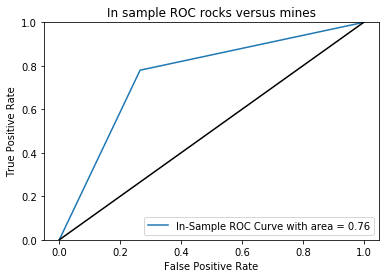

In [40]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_train,p_train)
area = auc(fpr,tpr)
pl.clf() 
pl.plot(fpr,tpr,label="In-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') 
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

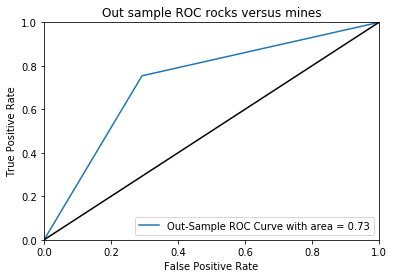

In [41]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() 
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') 
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()